In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import numpy as np
import os
import PIL 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [2]:
BATCH_SIZE= 32
IMAGE_SIZE= 256
CHANNELS=3
EPOCHS=50

In [3]:
train_path = 'D:\Deep Learning\Flowers\Flower Classification V2\V2\Training Data'
val_path = 'D:\Deep Learning\Flowers\Flower Classification V2\V2\Validation Data'
test_path = 'D:\Deep Learning\Flowers\Flower Classification V2\V2\Testing Data'

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 15000 files belonging to 10 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2355 files belonging to 10 classes.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5000 files belonging to 10 classes.


In [7]:
class_name=train_ds.class_names


In [8]:
class_name

['Aster',
 'Daisy',
 'Iris',
 'Lavender',
 'Lily',
 'Marigold',
 'Orchid',
 'Poppy',
 'Rose',
 'Sunflower']

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen= ImageDataGenerator(
     rescale=1./255,
     ##rotation_range=20,
     horizontal_flip=True,
 )
train_generator = train_datagen.flow_from_directory(
     train_path,
     target_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=32,
     class_mode="sparse"
)

Found 15000 images belonging to 10 classes.


In [12]:
class_names=list(train_generator.class_indices.keys())
class_names

['Aster',
 'Daisy',
 'Iris',
 'Lavender',
 'Lily',
 'Marigold',
 'Orchid',
 'Poppy',
 'Rose',
 'Sunflower']

In [13]:
val_datagen= ImageDataGenerator(
     rescale=1./255,
     ##rotation_range=20,
     horizontal_flip=True,
    ## vertical_flip=True
 )
val_generator = train_datagen.flow_from_directory(
     val_path,
     target_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=32,
     class_mode="sparse"
)

Found 5000 images belonging to 10 classes.


In [14]:
test_datagen= ImageDataGenerator(
     rescale=1./255,
   ## rotation_range=20,
     horizontal_flip=True,
    ## vertical_flip=True
 )
test_generator = train_datagen.flow_from_directory(
     test_path,
     target_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=32,
     class_mode="sparse"
)

Found 2355 images belonging to 10 classes.


In [15]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation= 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size = (3,3), activation= 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation= 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation= 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation= 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes,activation='softmax'),
  ])
    


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [17]:
model.compile(
     optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [18]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/MODELS/Flower_Classification.h5',
    monitor='val_loss',
    save_best_only=True
)

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [20]:
##!pip install pillow
model.fit(
      train_generator,
      steps_per_epoch=468,
      batch_size=32,
      validation_data=val_generator,
      validation_steps=156,
      verbose=1,
      epochs=50,
      callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
468/468 [==============================] - 561s 1s/step - loss: 1.9375 - accuracy: 0.2781 - val_loss: 1.5191 - val_accuracy: 0.4537
Epoch 2/50
468/468 [==============================] - 546s 1s/step - loss: 1.5659 - accuracy: 0.4548 - val_loss: 1.3580 - val_accuracy: 0.5395
Epoch 3/50
468/468 [==============================] - 552s 1s/step - loss: 1.4271 - accuracy: 0.5178 - val_loss: 1.3043 - val_accuracy: 0.5379
Epoch 4/50
468/468 [==============================] - 544s 1s/step - loss: 1.3355 - accuracy: 0.5621 - val_loss: 1.2121 - val_accuracy: 0.5865
Epoch 5/50
468/468 [==============================] - 534s 1s/step - loss: 1.2630 - accuracy: 0.5879 - val_loss: 1.1231 - val_accuracy: 0.6290
Epoch 6/50
468/468 [==============================] - 533s 1s/step - loss: 1.1957 - accuracy: 0.6198 - val_loss: 1.1149 - val_accuracy: 0.6308
Epoch 7/50
468/468 [==============================] - 531s 1s/step - loss: 1.1143 - accuracy: 0.6446 - val_loss: 1.0730 - val_accuracy: 0.6402

In [21]:
# model.evaluate(test_generator)

first image to predict
actual label: Lavender
1/1 [==============================] - 0s 242ms/step
predicted label: Lavender


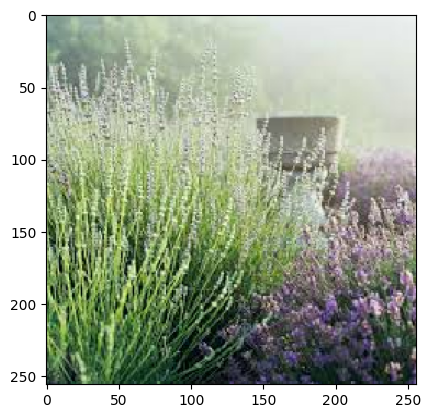

In [31]:

for image_batch, label_batch in test_generator:
  first_image = image_batch[0]
  first_label = int(label_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])
  batch_prediction = model.predict(image_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

 

  break


In [27]:
model.save('D:\Models\Flower_Classification.h5')

In [29]:
import os

model_path = 'D:\Models\Flower_Classification.h5' # Replace with your actual model path

if os.path.exists(model_path):
    print("Model file exists.")
else:
    print("Model file does not exist.")

##model.save('/content/drive/MyDrive/Flower_Classification.h5')


Model file exists.


In [30]:
model.evaluate(test_generator)

74/74 [==============================] - 16s 213ms/step - loss: 0.9408 - accuracy: 0.7096


[0.9407690167427063, 0.709554135799408]